# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Импортируем необходимые библиотеки

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

Загружаем данные

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Посмотрим на загруженные данные, и т.е. необходимо открыть и посмотреть три файла создадим функцию для просмотра данных

In [3]:
def views(data):
    display(data.head())
    print(data.info())
    display(data.describe())
    print('Количество дубликатов', data.duplicated().sum())

In [4]:
# Регион 0
views(geo_data_0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Количество дубликатов 0


In [5]:
# Регион 1
views(geo_data_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Количество дубликатов 0


In [6]:
# Регион 2
views(geo_data_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Количество дубликатов 0


Все датасеты состоят из столбцов:
- id - уникальный идентификатор скважины;
- f0, f1, f2 - три признака точек (значимые признаки);
- product - объем запасов в скважине (тыс. баррелей).

**Вывод:**
- дубликатов нет;
- пропусков в данных нет;
- id - не несет никакой информации для предсказания, можно удалить;
- есть нулевый значения в столбце product, необходимо проанализировать.

In [4]:
# Удаляем столбцы id
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

In [5]:
# Проверяем
print(geo_data_0.info())
print(geo_data_1.info())
print(geo_data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float6

In [6]:
# проверяем количество нулевых значений в каждом датасете в столбце product
print(geo_data_0[geo_data_0['product'] == 0]['product'].count())
print(geo_data_1[geo_data_1['product'] == 0]['product'].count())
print(geo_data_2[geo_data_2['product'] == 0]['product'].count())

1
8235
1


In [7]:
# Проверяем количество уникальных значений в столбцах
print(len(geo_data_0['product'].unique()))
print(len(geo_data_1['product'].unique()))
print(len(geo_data_2['product'].unique()))

100000
12
100000


**Вывод:** если в в датасетах geo_data_0 и geo_data_2 присутствуют только по одному нулевому значению, то в датасете geo_data_1 наблюдается 8235 нулевых значений. Если в датасетах geo_data_0 и geo_data_2 наблюдается большое количество уникальных значений (по 100000), в датасете geo_data_1 имеется всего 12 уникальных значений. Такое впечатление, что в нем пытались провести категоризацию данных по этому столбцу.

In [8]:
# Просматриваем количество различных встречающихся в столбце значений
geo_data_1['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

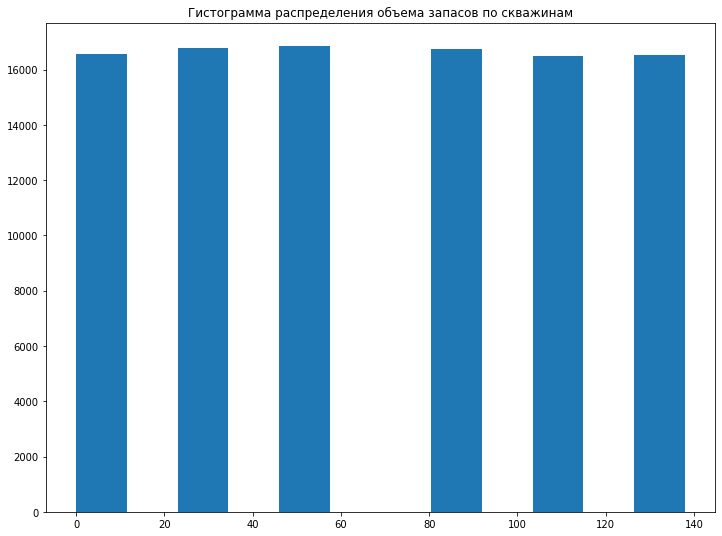

In [9]:
# Построим графики объема запасов в скважинах
plt.figure(figsize=[12,9])
plt.hist(geo_data_1['product'], bins=12)
plt.title('Гистограмма распределения объема запасов по скважинам')
plt.show()

**Вывод:** Большое количество нулевых значений, практически равное распрелеление и малая вариативность данных. Нулевые значения в данном случае нельзя заменить не на среднее, не на медиану. Т.к. наблюдается большое количество нулевых значений (8235), удалить эти данные тоже нельзя.

## Обучение и проверка модели

Для обучения модели подходит только линейная регрессия.
Напишем функцию, которая делит датасет на признаки и целевой признак, разбивает данные на обучающую и валидационную выборки, рассчитывает средний запас предсказанного сырья и RMSE модели. 

In [10]:
def region_prediction(data):
    # Разделяем на features и target
    features = data.drop(['product'], axis=1)
    target = data['product']
    # Разбиваем на обучающую и валидационную выборки
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    # Стандартизируем численные признаки
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    # задаем модель, обучаем ее находим по ней метрики
    model = LinearRegression(normalize=False)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    predictions = pd.Series(predictions)
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))
    avg_stock = data['product'].mean()
    avg_stock_pred = predictions.mean()
    return predictions, rmse, avg_stock, avg_stock_pred, target_valid.reset_index(drop=True)

In [11]:
# Запускаем функцию и находим метрики для региона 0
pred_0, rmse_0, avg_stock_0, avg_stock_pred_0, target_valid_0 = region_prediction(geo_data_0)
print('RMSE модели в регионе 0 = {:.3f}'.format(rmse_0))
print('Средний запас нефти региона 0 = {:.3f} баррелей'.format(avg_stock_pred_0))

RMSE модели в регионе 0 = 37.579
Средний запас нефти региона 0 = 92.593 баррелей


In [12]:
# Запускаем функцию и находим метрики для региона 1
pred_1, rmse_1, avg_stock_1, avg_stock_pred_1, target_valid_1 = region_prediction(geo_data_1)
print('RMSE модели в регионе 1 = {:.3f}'.format(rmse_1))
print('Средний запас нефти региона 1 = {:.3f} баррелей'.format(avg_stock_pred_1))

RMSE модели в регионе 1 = 0.893
Средний запас нефти региона 1 = 68.729 баррелей


In [13]:
# Запускаем функцию и находим метрики для региона 2
pred_2, rmse_2, avg_stock_2, avg_stock_pred_2, target_valid_2 = region_prediction(geo_data_2)
print('RMSE модели в регионе 2 = {:.3f}'.format(rmse_2))
print('Средний запас нефти региона 2 = {:.3f} баррелей'.format(avg_stock_pred_2))

RMSE модели в регионе 2 = 40.030
Средний запас нефти региона 2 = 94.965 баррелей


**Вывод:** Лучшие показатели RMSE модели в регионе 1 (RMSE=0.893), этот регион более предсказуем. Возмоно это следствие того, что данные отредактированы. 
Средний запас предсказанного сырья в этом регионе 68,729 баррелей, что меньше, чем в двух других регионах (92.953 и 94.965). В тих регионах высокие показатели RMSE, что говорит о том, что модель работае хуже, это дает более непредсказуемые результаты (37.597 и 40.030)

## Подготовка к расчёту прибыли

In [14]:
# Создадим значения в переменые для расчета прибыли
BUDGET = 10000000000
POINTS = 500
BEST_POINTS = 200
RISK_LOSS = 0.025
REVENUE_PER_UNIT = 450000

In [15]:
# разбуривание одного месторождения
drilling_deposit = BUDGET / BEST_POINTS
print('Бюджет бурения одного месторождения = ', drilling_deposit, 'руб')

Бюджет бурения одного месторождения =  50000000.0 руб


In [16]:
print('Объем сырья для безубыточной разработки новой скважины = {:.3f} баррелей'.format(drilling_deposit / REVENUE_PER_UNIT))

Объем сырья для безубыточной разработки новой скважины = 111.111 баррелей


In [17]:
print('Средний запас сырья региона 0 = {:.3f} баррелей'.format(avg_stock_0))
print('Средний запас сырья региона 1 = {:.3f} баррелей'.format(avg_stock_1))
print('Средний запас сырья региона 2 = {:.3f} баррелей'.format(avg_stock_2))

Средний запас сырья региона 0 = 92.500 баррелей
Средний запас сырья региона 1 = 68.825 баррелей
Средний запас сырья региона 2 = 95.000 баррелей


**Вывод:**
- средний запас сырья в скважине меньше, чем необходимый объем сырья для безубыточности;
- необходимо для безубыточной разработки новой скважины 111.111 баррелей;
- необходимо разрабатывать только перспективные скважины.

## Расчёт прибыли и рисков 

In [18]:
# Функция для расчета прибыли по выбранным скважинам и предсказаниям модели
def profit(prediction, target):
    data = pd.concat([prediction, target], axis=1)
    data.columns = ['prediction', 'target']
    data = data.sort_values(by = 'prediction', ascending = False)[:BEST_POINTS]
    return data['target'].sum() * REVENUE_PER_UNIT - BUDGET

In [19]:
revenue_0 = profit(pred_0, target_valid_0)
print('Прибыль от полученного объема сырья региона 0 = {} млн. руб.'.format(revenue_0 / 10e6))

Прибыль от полученного объема сырья региона 0 = 332.0826043139851 млн. руб.


In [20]:
revenue_1 = profit(pred_1, target_valid_1)
print('Прибыль от полученного объема сырья региона 1 = {} млн. руб.'.format(revenue_1 / 10e6))

Прибыль от полученного объема сырья региона 1 = 241.5086696681511 млн. руб.


In [21]:
revenue_2 = profit(pred_2, target_valid_2)
print('Прибыль от полученного объема сырья региона 2 = {} млн. руб.'.format(revenue_2 / 10e6))

Прибыль от полученного объема сырья региона 2 = 271.03499635998327 млн. руб.


In [22]:
# Функция для расчета прибыли и присков с применением Bootstrap
def revenue_bootstrap(prediction, target):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=POINTS, replace=True, random_state=state)
        pred_subsample = prediction[target_subsample.index]
        values.append(profit(pred_subsample, target_subsample))
    values = pd.Series(values)
    mean = np.mean(values) / 10e6
    lower = values.quantile(0.025) / 10e6
    upper = values.quantile(0.975) / 10e6
    risk_of_loss = (values < 0).sum() / values.count()
    return mean, lower, upper, risk_of_loss

In [23]:
# Запускаем функцию для региона 0
mean_0, lower_0, upper_0, risk_of_loss_0 = revenue_bootstrap(pred_0, target_valid_0)
print('Средняя прибыль региона 0 = {:.2f} млн.руб.'.format(mean_0))
print('95% доверительный интервал региона 0 от {:.2f} до {:.2f} млн.руб.'.format(lower_0, upper_0))
print('Процент риска для региона 0 = {:.1%}'.format(risk_of_loss_0))

Средняя прибыль региона 0 = 39.62 млн.руб.
95% доверительный интервал региона 0 от -11.12 до 90.98 млн.руб.
Процент риска для региона 0 = 6.9%


In [24]:
# Запускаем функцию для региона 1
mean_1, lower_1, upper_1, risk_of_loss_1 = revenue_bootstrap(pred_1, target_valid_1)
print('Средняя прибыль региона 1 = {:.2f} млн.руб.'.format(mean_1))
print('95% доверительный интервал региона 1 от {:.2f} до {:.2f} млн.руб.'.format(lower_1, upper_1))
print('Процент риска для региона 1 = {:.1%}'.format(risk_of_loss_1))

Средняя прибыль региона 1 = 45.60 млн.руб.
95% доверительный интервал региона 1 от 3.38 до 85.23 млн.руб.
Процент риска для региона 1 = 1.5%


In [25]:
# Запускаем функцию для региона 0
mean_2, lower_2, upper_2, risk_of_loss_2 = revenue_bootstrap(pred_2, target_valid_2)
print('Средняя прибыль региона 2 = {:.2f} млн.руб.'.format(mean_2))
print('95% доверительный интервал региона 2 от {:.2f} до {:.2f} млн.руб.'.format(lower_2, upper_2))
print('Процент риска для региона 2 = {:.1%}'.format(risk_of_loss_2))

Средняя прибыль региона 2 = 40.44 млн.руб.
95% доверительный интервал региона 2 от -16.34 до 95.04 млн.руб.
Процент риска для региона 2 = 7.6%


**Вывод:** 
Изучены данные всех трех регионов, обучена модель линейной регрессии, т.к. она является достаточно предсказуемой и сделан расчет прибыли и рисков для каждого региона.
Наиболее песпективным явялется регион 1, т.е. добача нефти в этом региона является наименее рискованной и предполагает получение наибольшей прибыли (в отличие от других регионов прибыло вообще не уходит в минус.
Остальные регионы имеют вероятность убытков больше 2,5 %, что не соотвествует условию задачи.